In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Set styles for plots
sns.set(style="whitegrid")

In [2]:
# Load the dataset (update the path if needed)
file_path = '../diabetes_012_health_indicators_BRFSS2021.csv'

try:
    diabetes_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please upload the correct file.")

Dataset loaded successfully.


In [3]:
# Display the first few rows of the dataset
diabetes_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [4]:
# Check for missing values in the dataset
missing_values_count = diabetes_data.isnull().sum()
print("Missing values count per column:\n", missing_values_count)

Missing values count per column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [5]:
# Assuming the target variable is 'Diabetes_012' (modify if needed)
X = diabetes_data.drop(columns=['Diabetes_012'])
y = diabetes_data['Diabetes_012']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Accuracy: 0.7529
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     39508
         1.0       0.04      0.05      0.04      1079
         2.0       0.28      0.31      0.29      6689

    accuracy                           0.75     47276
   macro avg       0.40      0.40      0.40     47276
weighted avg       0.77      0.75      0.76     47276



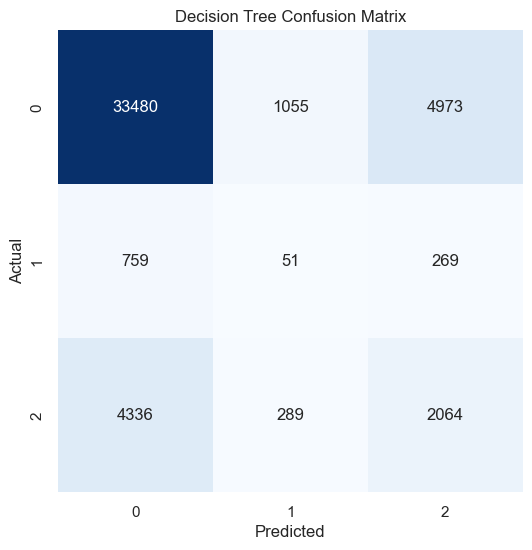

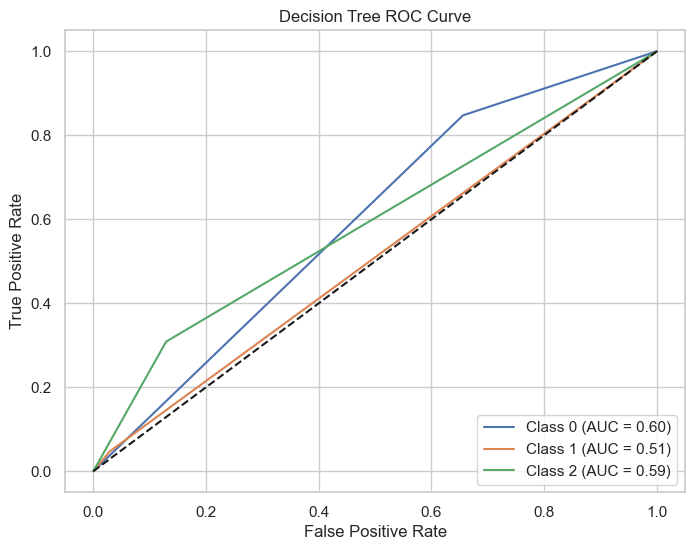

Random Forest Accuracy: 0.8329
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     39508
         1.0       0.02      0.00      0.00      1079
         2.0       0.46      0.19      0.27      6689

    accuracy                           0.83     47276
   macro avg       0.45      0.38      0.39     47276
weighted avg       0.78      0.83      0.80     47276



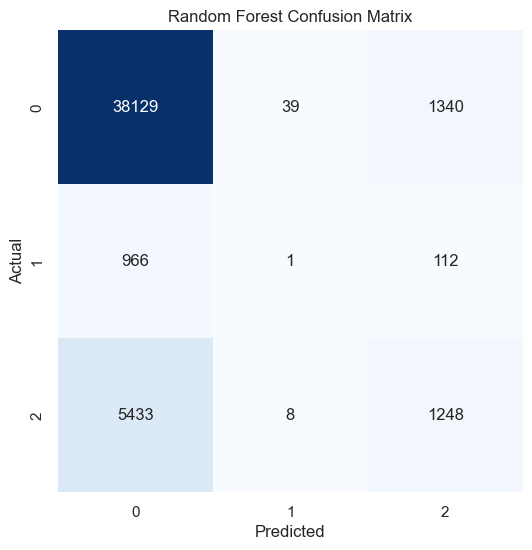

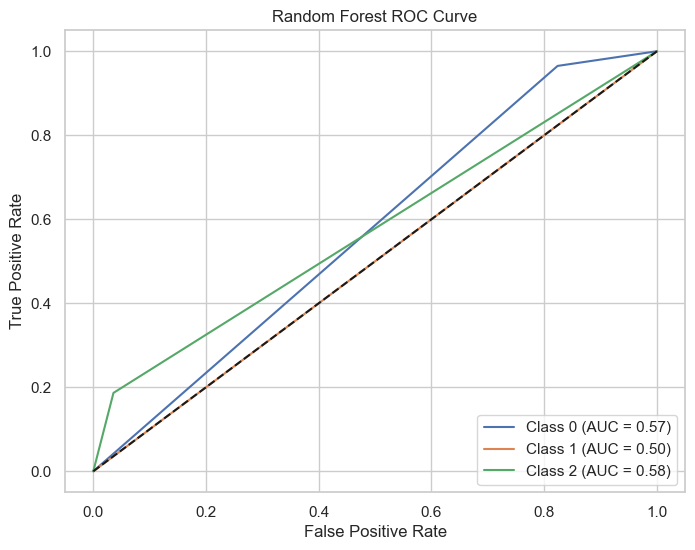

Gradient Boosting Accuracy: 0.8422
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     39508
         1.0       0.00      0.00      0.00      1079
         2.0       0.55      0.18      0.27      6689

    accuracy                           0.84     47276
   macro avg       0.47      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276



c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

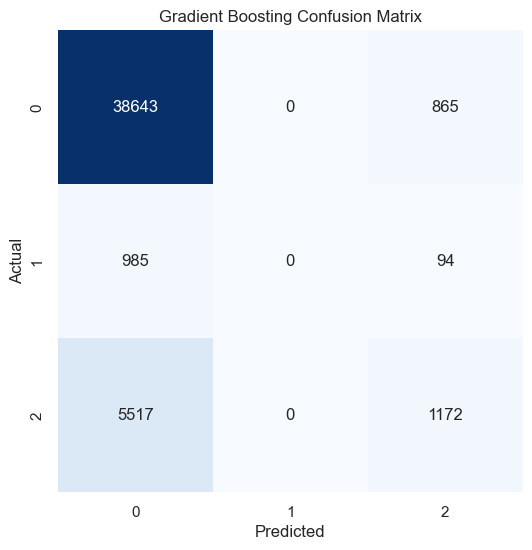

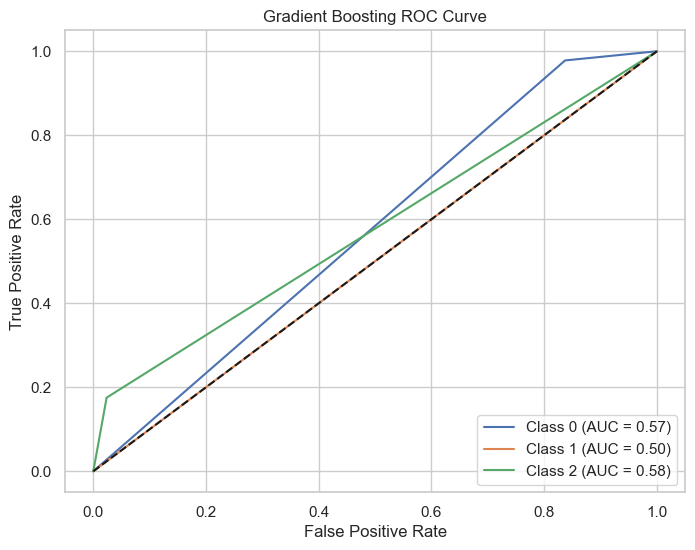

Logistic Regression Accuracy: 0.8399
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     39508
         1.0       0.00      0.00      0.00      1079
         2.0       0.53      0.17      0.26      6689

    accuracy                           0.84     47276
   macro avg       0.46      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276



c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p

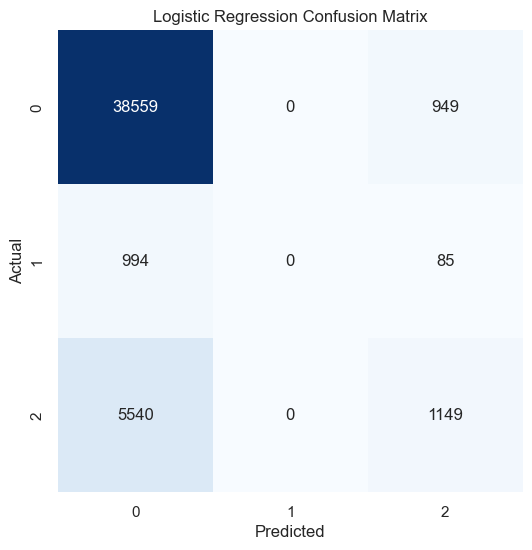

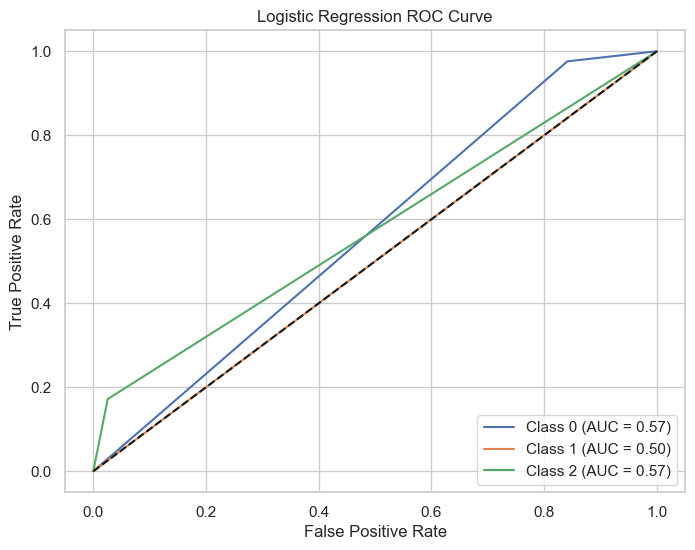

Naive Bayes Accuracy: 0.7512
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85     39508
         1.0       0.05      0.02      0.03      1079
         2.0       0.33      0.58      0.42      6689

    accuracy                           0.75     47276
   macro avg       0.43      0.47      0.43     47276
weighted avg       0.80      0.75      0.77     47276



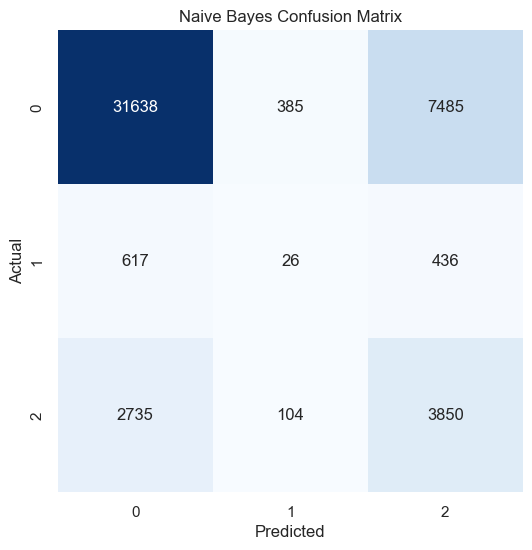

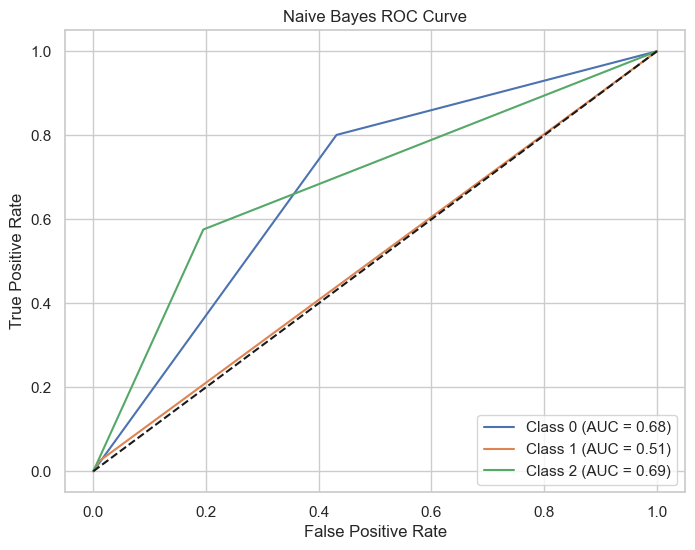

{'Decision Tree': 0.7529190286826296,
 'Random Forest': 0.8329384888738472,
 'Gradient Boosting': 0.8421820797021745,
 'Logistic Regression': 0.8399187748540485,
 'Naive Bayes': 0.7512056857602166}

In [6]:
# Train and evaluate multiple models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve for multi-class
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    print("="*50)

# Display accuracy scores
accuracy_scores

Epoch 1/50


c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4728/4728 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8317 - loss: 0.4703 - val_accuracy: 0.8391 - val_loss: 0.4383
Epoch 2/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8377 - loss: 0.4391 - val_accuracy: 0.8401 - val_loss: 0.4340
Epoch 3/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8388 - loss: 0.4320 - val_accuracy: 0.8406 - val_loss: 0.4296
Epoch 4/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8380 - loss: 0.4340 - val_accuracy: 0.8408 - val_loss: 0.4290
Epoch 5/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8376 - loss: 0.4284 - val_accuracy: 0.8410 - val_loss: 0.4275
Epoch 6/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8375 - loss: 0.4318 - val_accuracy: 0.8408 - val_loss: 0.4266
Epoch 7/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8386 - loss: 0.4294 - val_accuracy: 0.8393 - val_loss: 0.4312
Epoch 8/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8394 - loss: 0.4280 - val_accurac

c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

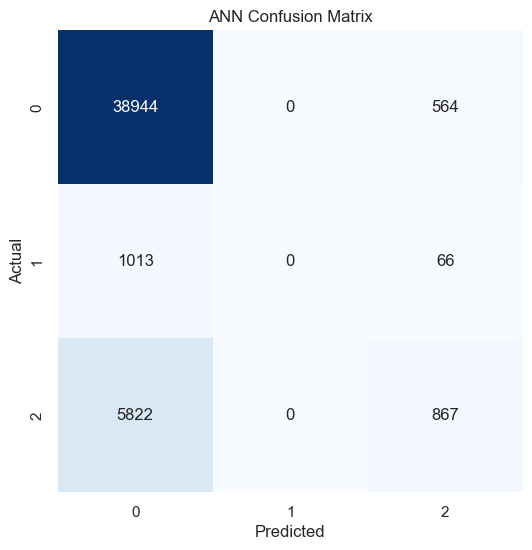

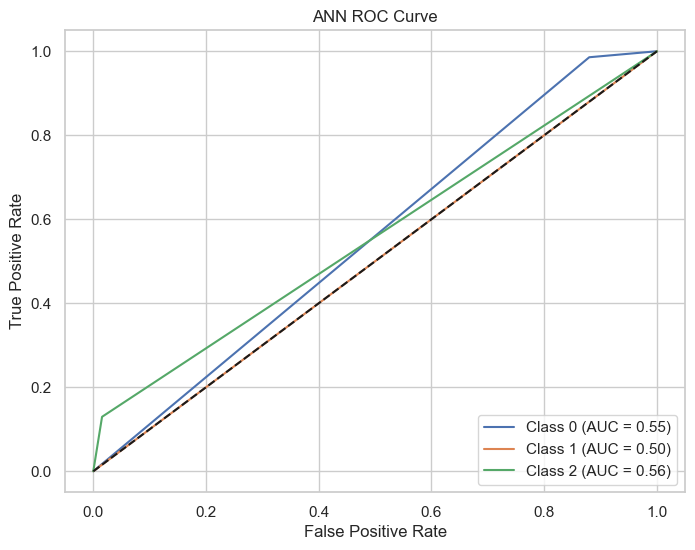

{'Decision Tree': 0.7529190286826296,
 'Random Forest': 0.8329384888738472,
 'Gradient Boosting': 0.8421820797021745,
 'Logistic Regression': 0.8399187748540485,
 'Naive Bayes': 0.7512056857602166,
 'ANN': 0.8420974701751417}

In [7]:
# Artificial Neural Network (ANN)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate ANN
y_pred_ann = model.predict(X_test)
y_pred_ann = np.argmax(y_pred_ann, axis=1)

accuracy_ann = accuracy_score(y_test, y_pred_ann)
accuracy_scores['ANN'] = accuracy_ann

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(classification_report(y_test, y_pred_ann))

# Confusion Matrix for ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for ANN
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_ann, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("="*50)

# Display final accuracy scores
accuracy_scores